# Анализ видеоигр интернет-магазина «Стримчик»

# Задача проекта

С помощью данных о продажах, оценках и жанрах игр нужно провести исследовательский анализ, проверить гипотезы, составить портрет каждого пользователя в разных регионах. Найти причины, которые помогают играм стать популярными, чтобы предугадать потенциально популярный продукт

## Загрузка и изучение данных

Загрузим все нужные библиотеки

In [36]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats as st

Поверхностно ознакомимся с таблицой

In [37]:
games = pd.read_csv('/datasets/games.csv')
display(games.head(10))
print()
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После просмотра данных в глаха бросается, что cтолбецы Year_of_Release и Critic_Score должны иметь тип int, а не float64

## Подготовка данных

### Приведем названия столбцов к нижнему регистру

In [38]:
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков и дубликатов

Посмотрим на дубликаты и пропуски

In [39]:
len(games[games.duplicated()])

0

Дубликатов нет

In [40]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Можно еще так посмотреть на пропуски. Тут белые горизонтальные линии обозначаются пропусками

In [41]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

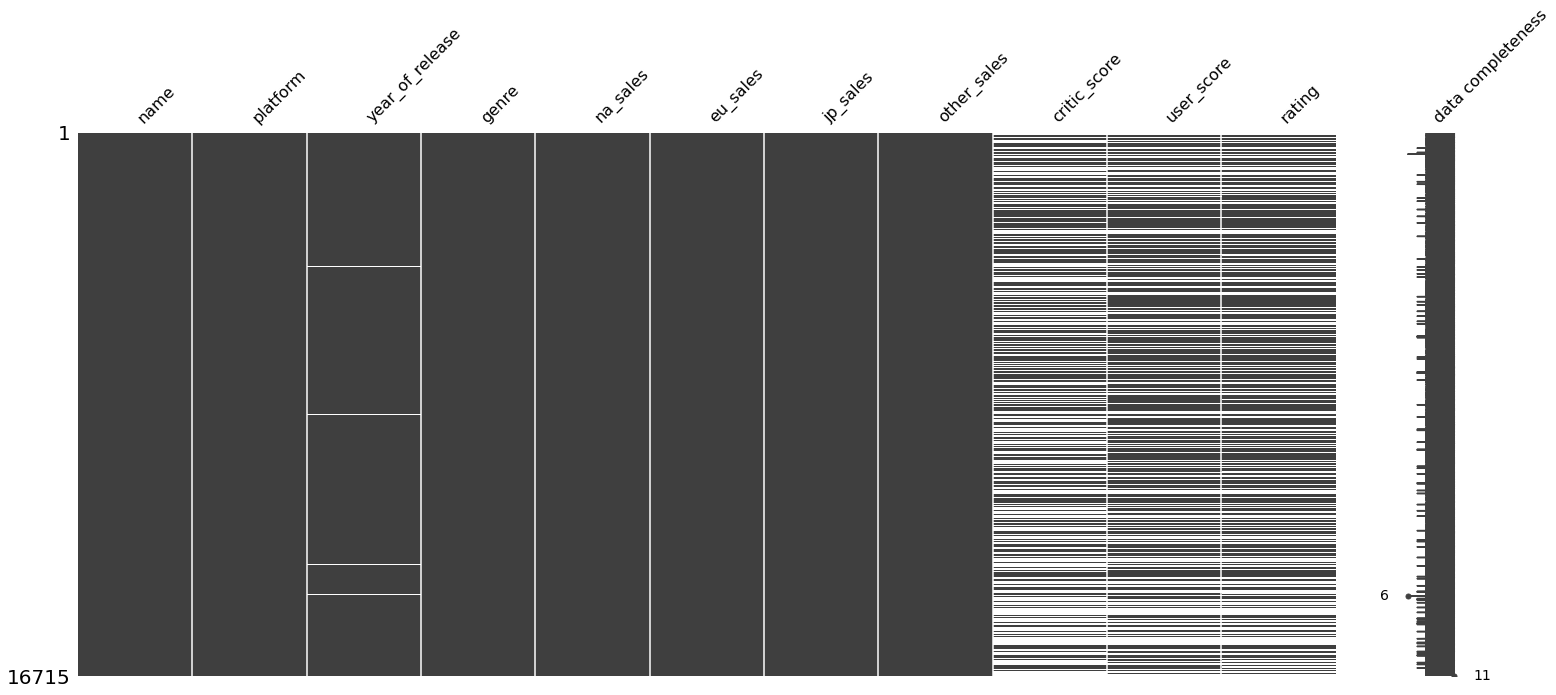

In [42]:
msno.matrix(games, labels = True);

In [43]:
print(games.shape[0])
games = games.dropna(subset = ['name', 'genre', 'year_of_release'])
games.shape[0]

16715


16444

Удалим данные пропуски, т.к. их мало и это не повлияет на анализ

In [44]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [45]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значение tbd на NaN, т.к. tbd говорит нам о том, что оценки еще нет

In [46]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [47]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Оставим эти пропуски, т.к. их достаточно много, чтобы удалить. Заполнить пропуски средним значением опасно, ведь они могли возникнуть из-за того, что игры только вышли, и люди могли не успеть оставить отзыв. В некоторых странах эта игра могла быть недоступна. Возможно, возникла ошибка при передаче данных.

### Изменим типы данных столбцов

В столбце year_of_release должны быть целые числа, а в user_score не тип object, а float64

In [48]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Мы поменяли тип данных в столбце year_of_release, т.к. год должен быть целым, а user_score это средняя оценка, которая должна быть не целым числом 

### Создадим столбец с суммарными продажами

In [49]:
games['sum_sales'] = games[['na_sales'] + ['eu_sales'] + ['jp_sales'] + ['other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Теперь есть столбец, который показывает все продажи игр в интернет-магазине «Стримчик»

На данном шаге мы обработали данные. Привели названия столбцов к нижнему регистру, обработали пропуски и дубликаты, убрав некоторые данные. После этого поменяли типы данных у некоторых столбцов. Это поможет нам дальше в работе с проектом

## Исследовательский анализ данных

### Найдем актуальный период игр, их платформ

Посмотрим, сколько игр выпускалось в разные годы

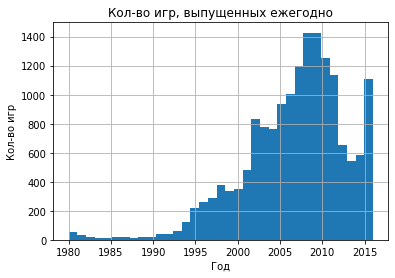

In [50]:
games['year_of_release'].hist(bins = 35)
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.title('Кол-во игр, выпущенных ежегодно')
plt.show()

Игры, выпущенные много лет назад, скорее всего потеряли свою актуальность. Поэтому данные по ним нас не слишком интересуют.

In [51]:
platform = games.pivot_table(index = 'platform', aggfunc={'sum_sales': 'sum'})
platform = platform.sort_values('sum_sales', ascending = False)
platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем популярные платформы

In [52]:
platform = platform.head(6)
platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим графики по этим платформам по годам.

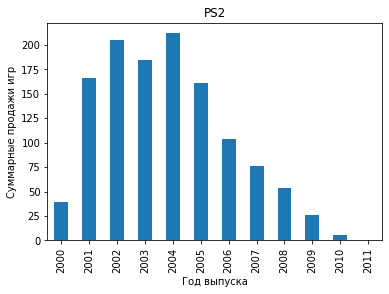

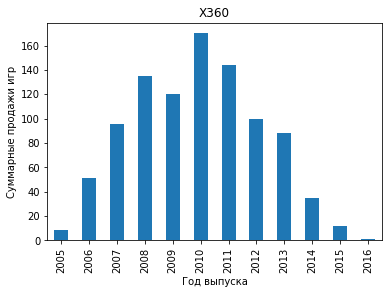

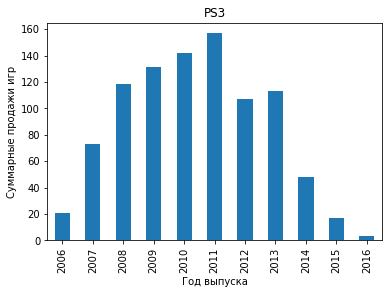

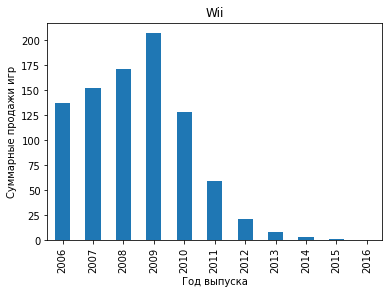

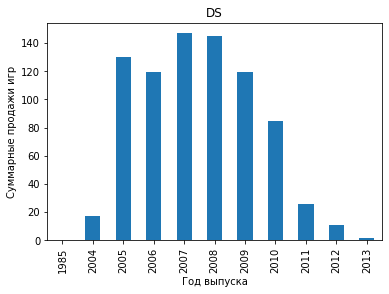

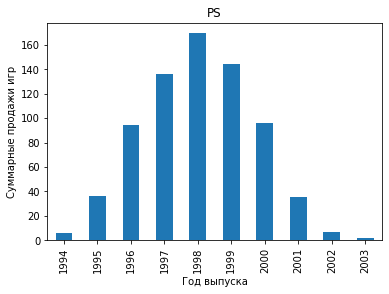

In [53]:
platforms = platform.index # создаем массив из названий платформ
games_platforms = games.loc[games['platform'].isin(platforms)] # делаем срез по названиям из массива платформ
for platform in platforms: #  с помощью цикла перебираем все платформы по которым строим столбчатые диаграммы
    games_platforms[games_platforms['platform'] == platform].pivot_table(index=\
                            'year_of_release', values='sum_sales',\
                            aggfunc='sum').plot(kind='bar', title=platform, xlabel='Год выпуска',\
                            ylabel='Суммарные продажи игр',legend=0)

По данным графикам можно сказать, что платформы популярны около 6 лет. Потом появляются новые, которые набирают популярность.  Лучше всего это заметно на платформах PS

Из всех рассчетов можно сделать вывод, что лучше всего взять за последие 5 лет. Чем позже выпущены игры, тем они актуальней. Хоть платформы и популярны около 6 лет, лучше взять промежуток с 2012, т.к. платформы, которые были выпущены чуть раньше, могут потерять свою популярность уже в следующем году

### Найдем перспективные платформы

Посмотрим на данные о продажах на популярных платформах за последние 4 года

In [54]:
r = games.query('year_of_release > 2012') # создаем датафрейм, который будем часто использовать позже
q = r.pivot_table(index = 'platform', aggfunc={'sum_sales': 'sum'})
q = q.sort_values('sum_sales', ascending = False)
q

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Возьмем побольше популярных платформ, т.к. некоторые могли еще не набрать популярность

In [55]:
q = q.head(8)
q

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


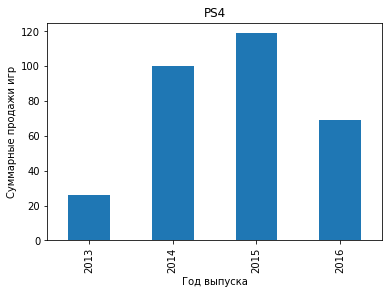

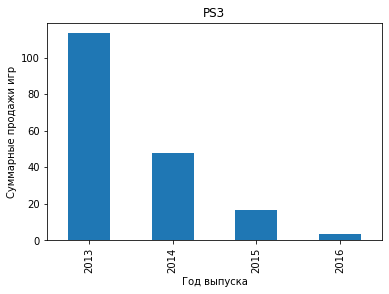

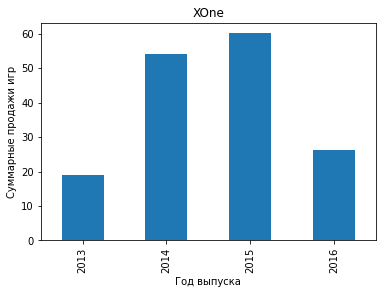

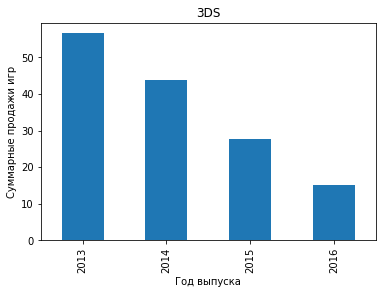

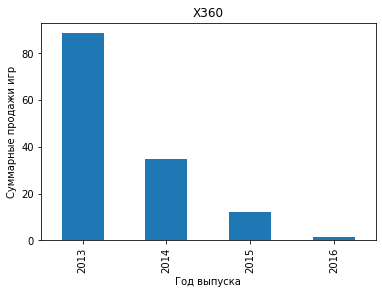

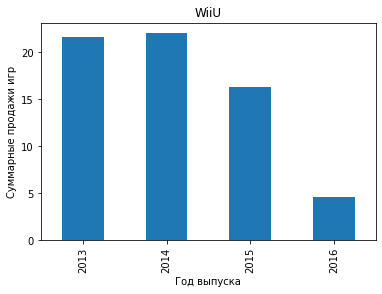

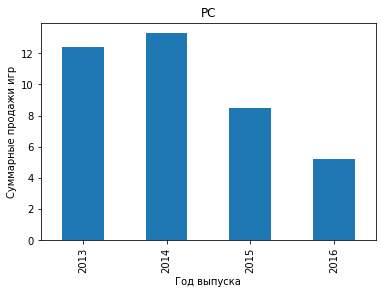

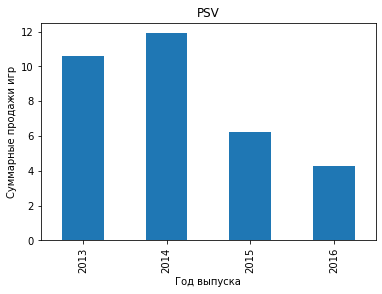

In [56]:
w = q.index
e = r.loc[games['platform'].isin(w)]
for i in w:
    e[e['platform'] == i].pivot_table(index=\
                            'year_of_release', values='sum_sales',\
                            aggfunc='sum').plot(kind='bar', title=i, xlabel='Год выпуска',\
                            ylabel='Суммарные продажи игр',legend=0)

Больше всего по продажам за последние годы лидируют платформы: PS4, XOne и 3DS. PS4 и XOne с 2013 по 2015 г. росли, а потом происходил небольшой спад, видимо, данные предоставлены не за весь 2016 год. У 3DS нет потенциала в 2017 г., т.к. видно стабильное понижение в продажах. Из этого можно сделать вывод, что самые перспективные платформы в 2017 году это PS4 и XOne

(0.0, 2.0)

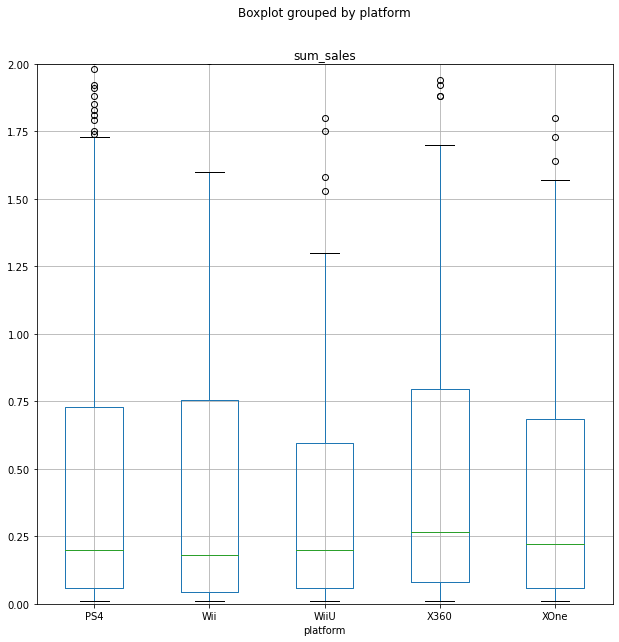

In [57]:
top_pl = ['PS4', 'Wii', 'WiiU', 'X360', 'XOne']
top_platforms = r.loc[games['platform'].isin(top_pl)]
top_platforms.boxplot(column='sum_sales',by='platform', figsize=(10,10))
plt.ylim(0,2)

По графику видно, что все платформы находятся близко друг к другу. Нет выделяющихся.

### Влияние отзывов на продажи

Для начала определим зависимость на одной из популярных платформ. Пусть это будет PS4. У нас есть отзывы критиков и пользователей. Посмотрим на них отдельно

0.40656790206178095

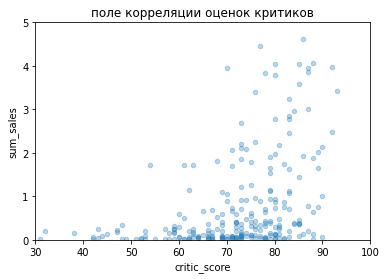

In [58]:
r_ps = r.query('platform == "PS4"')
r_ps.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, xlim = (30, 100), ylim = (0, 5), title = 'поле корреляции оценок критиков')
r_ps['critic_score'].corr(r_ps['sum_sales'])

По графику видно, что высокие оценки критиков увеличивают кол-во покупок на данной платформе. По коэффициенту корреляции зависимость слабая, но есть.

-0.031957110204556376

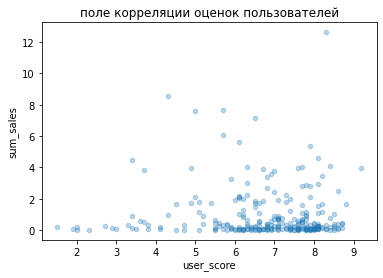

In [59]:
r_ps.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, title = 'поле корреляции оценок пользователей')
r_ps['user_score'].corr(r_ps['sum_sales'])

Зависимость отсутствует

 Можно сделать вывод, что влияние продаж игр на платформе зависит только от отзывов критиков. Проверим это на других популярных  платформах после 2012 года

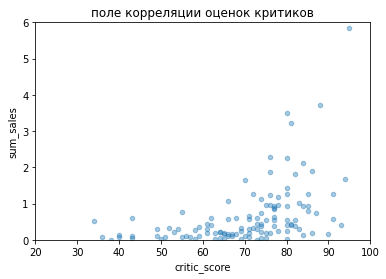

Значение корреляции критиков для PS3 равно:, 0.3342853393371919


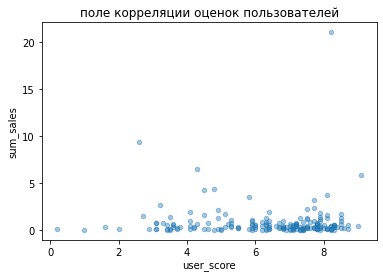

Значение корреляции пользователей для PS3 равно:, 0.0023944027357566925


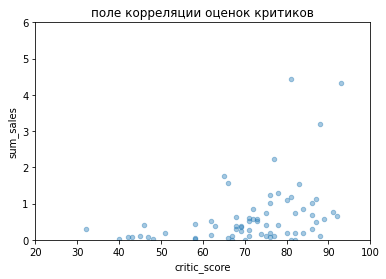

Значение корреляции критиков для WiiU равно:, 0.3764149065423912


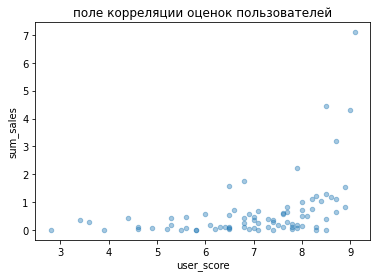

Значение корреляции пользователей для WiiU равно:, 0.4193304819266187


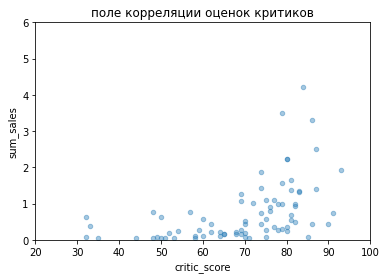

Значение корреляции критиков для X360 равно:, 0.3503445460228664


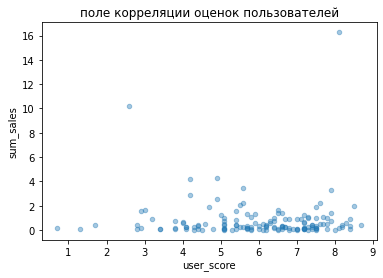

Значение корреляции пользователей для X360 равно:, -0.011742185147181342


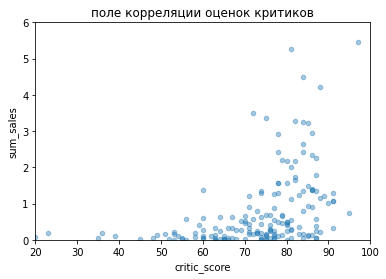

Значение корреляции критиков для XOne равно:, 0.4169983280084017


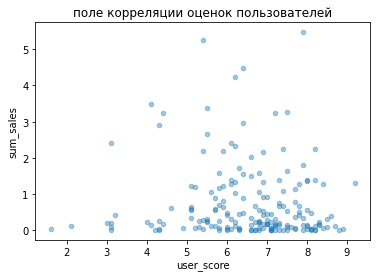

Значение корреляции пользователей для XOne равно:, -0.06892505328279414


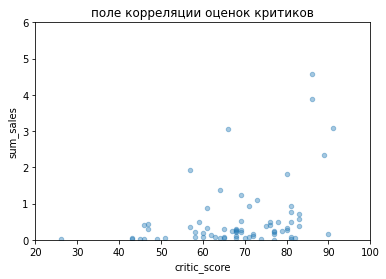

Значение корреляции критиков для 3DS равно:, 0.3570566142288103


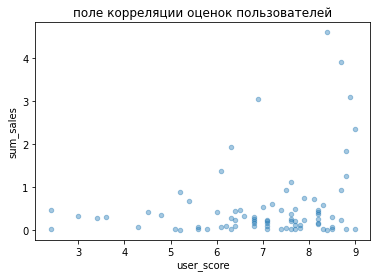

Значение корреляции пользователей для 3DS равно:, 0.24150411773563016


In [60]:
platforms = ['PS3', 'WiiU', 'X360', 'XOne', '3DS']
for platform in platforms:
    r_pl = r[r['platform'] == platform]
    r_pl.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.4, xlim = (20, 100), ylim = (0, 6), title = 'поле корреляции оценок критиков')
    plt.show()
    corr_critic_score = r_pl['critic_score'].corr(r_pl['sum_sales'])
    print(f'Значение корреляции критиков для {platform} равно:, {corr_critic_score}')
    r_pl.plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.4, title = 'поле корреляции оценок пользователей')
    plt.show()
    corr_user_score = r_pl['user_score'].corr(r_pl['sum_sales'])
    print(f'Значение корреляции пользователей для {platform} равно:, {corr_user_score}')

В большинстве случаев корреляция от критиков больше, чем от обычных пользователей. Поэтому вывод с платформой PS4 был правильный. Обычные люди не влияют на кол-во покупок своими отзывами, а от оценок критиков зависят продажи игра на платформах.

In [61]:
# сумма скачиваний жанров
r_genres = pd.pivot_table(r, index='genre', values='sum_sales', aggfunc=['mean', 'sum'])
r_genres.columns = ['mean', 'sum']
r_genres = r_genres.sort_values(by = 'sum', ascending = False)
r_genres

,mean,sum
genre,,
Action,0.420196,321.87
Shooter,1.245882,232.98
Sports,0.703972,150.65
Role-Playing,0.499623,145.89
Misc,0.405290,62.82
Platform,0.576081,42.63
Racing,0.469294,39.89
Fighting,0.441375,35.31
Adventure,0.096490,23.64


In [62]:
r_genres = pd.pivot_table(r, index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)

Больше всего выделяются игры с жанрами Action и Shooter. Меньше всего - Strategy и Puzzle. Но это еще не означает, что такие жанры самые выгодные, т.к. их может быть больше по кол-ву по сравнению с другими. Посмотрим на средние показатели о продажах. В столбце mean с самыми большими показателями шутеры и спортивные игры. Именно эти жанры будут самыми прибильными.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Составим портрет пользователя для каждого региона

### Северная Америка

Для этого возьмем датафрейм r, в котором значения столбца year_of_release больше 2012. Посмторим на самые популярные платформы в каждом регионе. Начнем с NA_sales — продажи в Северной Америке (миллионы проданных копий)

In [63]:
na = r.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum') # построим таблицу по платформам и сумме продаж для каждой платформы
na = na.sort_values('na_sales', ascending = False) # отсортируем
z = na['na_sales'].sum() # общая сумма столбца na_sales, чтобы посчитать потом доли
na['dolya'] = na['na_sales'] / z # добавляем столбец с долями
e = na.head() # посмотрим какую долю занимает сумма первых пяти платформ
print(e['dolya'].sum())
na.head()

0.880080418541957


,na_sales,dolya
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272


В Северной Америке за последние несколько лет самые популярные платформы видны на графике. Сумма их долей равна 0.88, т.е. 88%.

Теперь посмотрим на самые популярные жанры в Северной Америке

In [64]:
na_genre = r.pivot_table(index='genre', values='na_sales' , aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre.head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


В Северной Америке два самых популярных жанра это Action и Shooter	

In [65]:
r = r.reset_index()
r['rating'] = r['rating'].fillna('no_info') # пропуски означают, что рейтинг просто не успели поставить, поэтому их тоже стоит учесть
na_rating = r.pivot_table(index='rating', values='na_sales' , aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.21
no_info,89.42
E,79.05
E10+,54.24
T,49.79


Видно, что очень много игр с рейтингом М, который дает ограничение по возрасту от 17 лет. Это влияет на продажу, т.к. люди младше 17 лет не могут покупать эту игру. 

### Европа

Теперь проанализируем Европу

In [66]:
eu = r.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum') # построим таблицу по платформам и сумме продаж для каждой платформы
eu = eu.sort_values('eu_sales', ascending = False) # отсортируем
z = eu['eu_sales'].sum() # общая сумма столбца na_sales, чтобы посчитать потом доли
eu['dolya'] = eu['eu_sales'] / z # добавляем столбец с долями
e = eu.head() # посмотрим какую долю занимает сумма первых пяти платформ
print(e['dolya'].sum())
eu.head()

0.8514647018331082


,eu_sales,dolya
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


In [67]:
eu_genre = r.pivot_table(index='genre', values='eu_sales' , aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre.head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [68]:
eu_rating = r.pivot_table(index='rating', values='eu_sales' , aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
no_info,78.91
E10+,42.69
T,41.95


По данным таблицам о Европе можно сказать, что очень большая доля приходится на платформу PS4. Первые 5 платформ составляют около 85% от продаж игр. Самые популярные жанры игр это: Action, Shooter и Sports. Похоже на Северную Америку. Рейтинг ESRB влияет на продажи

### Япония

In [69]:
jp = r.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum') # построим таблицу по платформам и сумме продаж для каждой платформы
jp = jp.sort_values('jp_sales', ascending = False) # отсортируем
z = jp['jp_sales'].sum() # общая сумма столбца na_sales, чтобы посчитать потом доли
jp['dolya'] = jp['jp_sales'] / z # добавляем столбец с долями
e = jp.head() # посмотрим какую долю занимает сумма первых пяти платформ
print(e['dolya'].sum())
jp.head()

0.9702372496093195


,jp_sales,dolya
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284


In [70]:
jp_genre = r.pivot_table(index='genre', values='jp_sales' , aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre.head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [71]:
jp_rating = r.pivot_table(index='rating', values='jp_sales' , aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
no_info,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


В Японии одна платформа 3DS занимает практически половину от продаж всех игр. У них достаточно мало платформ, т.к. первые 5 шт занимают 97% от всего рынка. Игры типа экшн не так популярны в Японии, как ролевые игры, видимо, поэтому японцев так много. Рейтинг ESRB не влияет на продажи, т.к. у большинства игр просто нет оценок.

Из всех проведенных анализов можно составить идеальные портреты людей из разных регионов. Обычный 18 летний американец, который только недавно смог купить игру из-за ESRB сидит дома и играет в экшн или шутер на PS4 или XOne. Где-то в Европе ровесник американца также играет играет в экшн или шутер, но уже на PS4. А в этот момент среднестатистический пятилетний японец сидит и играет в ролевые игры на платформе 3DS.

## Проверка гипотез

Проверим пару гипотез, связанных с рейтингом платформ и жанров.

### Пользовательские рейтинги платформ

Нам нужно проверить одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC. Для этого нам нужно будет воспользоваться методом scipy.stats.ttest_ind, т.к. у нас есть две независымые выборки с пользовательскими рейтингами платформ Xbox One и PC. Нулевая гипотеза (Н0) будет такой: средние пользовательские рейтинги платформ XOne и PC одинаковые. Альтернативная гипотеза (Н1) - Средние пользовательские рейтинги платформ XOne и PC разные. Мы будем проверять двустороннюю гипотезу. Критический уровень статистической значимости возьмем равным 0.05

In [72]:
r_xbox = r[r['platform'] == 'XOne']['user_score'].dropna() # удалим пропуски на всякий случай
r_pc = r[r['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(r_xbox, r_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


pvalue оказалось больше критического уровеня статистической значимости, поэтому нулевую гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые, не отвергаем

### Пользовательские рейтинги жанров

Гипотеза звучит так: средние пользовательские рейтинги жанров Action и Sports разные. Тут тоже понадобится тест типа st.ttest_ind, т.к. у нас две разные выборки, которые нужно сравнить. Н0: средние пользовательские рейтинги жанров Action и Sports одинаковые. Н1: средние пользовательские рейтинги жанров Action и Sports разные. Мы будем проверять двустороннюю гипотезу. Критический уровень статистической значимости возьмем равным 0.05

In [73]:
r_action = r[r['genre'] == 'Action']['user_score'].dropna()
r_sports = r[r['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(r_action, r_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу. Это значит, что средние пользовательские рейтинги жанров Action и Sports разные

Мы проверили две гипотезы. Получилось, что средние пользовательские рейтинги платформ XOne и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные

# Вывод

В данном проекте мы проанализировали данные о видеоиграх с помощью интернет-магазина «Стримчик». Ознакомились с датафреймом, собранным за последние 20 лет, о названиях, покупках, жанрах, регонах, различных рейтингов. Обработали пропуски, дубликаты, добавили столбцы, поменяли типы некоторых данных, чтобы с ними было легче работать. Затем провели исследовательский анализ данных, в которых нашли актуальный период игр, их платформ, нашли перспективные платформы, посмотрели на влияние отзывов на продажи. Лучше всего под это подошли платформы PS4, XOne. Составили портреты пользователя из Северной Америки, Европы и Японии. Оказалось, что американцы в основном играют в экшн или шутер на PS4 или XOne. В Европе люди играют в экшн или шутер, но уже на PS4. А японцы - в ролевые игры на платформе 3DS. Проверили гипотезы о пользовательском рейтинге платформ и жанров. По всем выводам можно сказать, что в 2017 году одними из самых популярных платформ будут: PS4 и XOne. Прибыльными играми будут шутеры или спортивные игры. Это поможет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.